In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LinearRegression
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Загрузим файл в df
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Разделим независимые переменные и целевые на X и y
X = np.array(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
y = np.array(df[['Outcome']]).flatten()

In [4]:
# Разделим выборку на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [5]:
# Построим модель KNN 
y_neig = []
n_neighbors = 5 ## Алгоритм с KNN = 5
model = KNeighborsClassifier(n_neighbors = n_neighbors)
model.fit(X_train, y_train)
y1 = model.score(X_test, y_test)
y_neig.append(y1)
print(y1)

0.7291666666666666


In [6]:
n_neighbors = 10 ## Алгоритм с KNN = 10
model = KNeighborsClassifier(n_neighbors = n_neighbors)
model.fit(X_train, y_train)
y2 = model.score(X_test, y_test)
y_neig.append(y2)
print(y2)

0.765625


In [7]:
n_neighbors = 15 ## Алгоритм с KNN = 15
model = KNeighborsClassifier(n_neighbors = n_neighbors)
model.fit(X_train, y_train)
y3 = model.score(X_test, y_test)
y_neig.append(y3)
print(y3)

0.7395833333333334


In [8]:
n_neighbors = 20 ## Алгоритм с KNN = 20
model = KNeighborsClassifier(n_neighbors = n_neighbors)
model.fit(X_train, y_train)
y4 = model.score(X_test, y_test)
y_neig.append(y4)
print(y4)

0.7916666666666666


In [9]:
n_neighbors = 25 ## Алгоритм с KNN = 25
model = KNeighborsClassifier(n_neighbors = n_neighbors)
model.fit(X_train, y_train)
y5 = model.score(X_test, y_test)
y_neig.append(y5)
print(y5)

0.765625


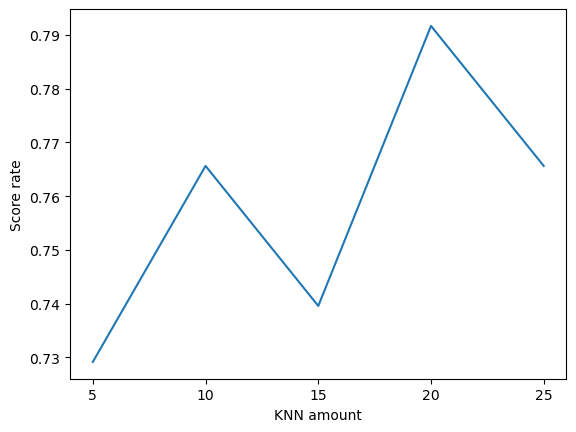

In [10]:
# Сравним скорринг модели для разных значений k
x_neig = [5, 10, 15, 20, 25]
y_neig
plt.plot(x_neig, y_neig)
plt.xlabel('KNN amount')
plt.ylabel('Score rate')
plt.xticks([5, 10, 15, 20 ,25])
plt.show()

In [11]:
# Выделим отдельно выборку для регрессионного анализа
X_reg = df[['SkinThickness', 'BMI']]
y_reg = df[['Insulin']]

In [12]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size = 0.25)

In [13]:
# Построим модель множественной лин. регрессии
model2 = LinearRegression()
model2.fit(Xr_train, yr_train)
model2.score(Xr_test, yr_test)
yr_pred = model2.predict(Xr_test)
yr_pred = yr_pred.flatten()
yr_test = np.array(yr_test)
yr_test = yr_test.flatten()

# Сравним отклонение от реальных значений
d = {'yr_pred': yr_pred, 'yr_test': yr_test, 'diff': np.abs(yr_test - yr_pred)}
pd.DataFrame(d)

,yr_pred,yr_test,diff
0,23.321539,0,23.321539
1,67.293396,0,67.293396
2,178.118886,0,178.118886
3,72.630798,63,9.630798
4,20.370168,0,20.370168
...,...,...,...
187,28.308340,0,28.308340
188,112.350648,0,112.350648
189,55.159702,0,55.159702
190,66.173910,144,77.826090


In [14]:
model2.score(Xr_test, yr_test) ## Качество данной модели

0.2365888459214852

In [15]:
model2.coef_ = model2.coef_.reshape(2)

In [16]:
print(f'Формула y = a + a1*x + a2*x. Коэффициент a = {model2.intercept_[0]}, a1 = {model2.coef_[0]}, a2 = {model2.coef_[1]}.')

Формула y = a + a1*x + a2*x. Коэффициент a = 5.918623708830111, a1 = 2.8440016546449036, a2 = 0.5088571821058595.


In [17]:
# Построим модель классификации наличия диабета по всем признакам, используя метод Decision Tree Gini
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names,
    filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

dt_classifier = DecisionTreeClassifier(criterion = 'gini')

In [18]:
dt_classifier.fit(X, y)

DecisionTreeClassifier()

In [19]:
headers = df.columns[:-1]

In [22]:
# Выведем обученную модель в виде диаграммы дерева решений в файл .png
tree_graph_to_png(dt_classifier, feature_names=headers, png_file_to_save='gini.png')

In [36]:
data = np.array([[5, 120, 40, 30, 160, 25, 0.2, 40]]) # Проверим модель для случайных данных
print(dt_classifier.predict(data)) # В результате получили, что по нашим данным нет заболевания.

[0]
